# Gráficar resultados
El siguiente script está dedicado a visualizar los resultados del análisis sentimental y dimensional de tweets. Sin considerar el factor tiempo, sino para 'sacar la foto' en un momento determinado.

## Importar librerías
Para este script solo debiesemos necesitas: pandas, matplotlib, math (pi, para graficar las arañas) y seabron para tener gráficos más choriflai

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from math import pi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datos
Lectura de csv de resultados.
Se definen los siguientes archivos:

- **df_tweets**: Dataframe que contiene la información de tweets, sentimentalidad, territorio, texto, etc..
- **df_subtema**: df_tweets agrupado por subtema (subdimensión)
- **df_tema**: df_tweets agrupado por tema (dimensión)

In [2]:
name = 'Alto_Maipo'
df_tweets = pd.read_excel('Results//' + name + '_tweets.xlsx') #Generadoras
df_subtema = pd.read_excel('Results//' + name + '_subtema.xlsx')
df_tema = pd.read_excel('Results//' + name + '_tema.xlsx')

## Funciones para gráficar
Se definen las siguientes funciones:

- **spider_chart**: Para graficar un gráfico araña general (donde cada punta es una dimensión)
- **subtopic**: Para gráficar dedicado para cada dimensión (donde cada punta es una subdimensión)

In [3]:
#Función para graficar un gráfico araña
def spider_chart(df, var1, var2, title):
    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    # Set data
    N = len(categories)
    sns.set_style("whitegrid")
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    plt.rcParams["figure.figsize"] = (10,4)
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,1)

    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't make a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    var_list = df['index'].to_list()

    values = df.loc[var_list.index(var1)].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Índice de comentarios positivos")
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values = df.loc[var_list.index(var2)].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Índice de comentarios negativos", color='r')
    ax.fill(angles, values, 'r', alpha=0.1)

    #Add title
    plt.title(title)

    # Add legend
    plt.legend(loc='best', bbox_to_anchor=(0.2, 0., 0., 0.))


    # Show the graph
    plt.show()

In [4]:
#Función para graficar dependiendo de una subdimensión
def subtopic(df1):
    temas = df1.tema.drop_duplicates().to_list()
    for i, tema in enumerate(temas):
        sentiment_options = ['POS', 'NEG', 'NEU']
        df = df1[df1['tema'] == tema]
        df['Total'] = df[sentiment_options].sum(axis=1)
        df['pos_index'] = df.POS / df.Total
        df['neg_index'] = df.NEG / df.Total
        df = df.fillna(0)
        df = df[['subtema', 'pos_index', 'neg_index']].set_index('subtema').transpose().reset_index()
        title = str(tema)
        spider_chart(df, 'pos_index', 'neg_index', 'Análisis sentimental por dimensión: ' + title)

## Resultados
Los gráficos que se obtienen desde los datos obtenidos y con las funciones definidas son los siguientes:

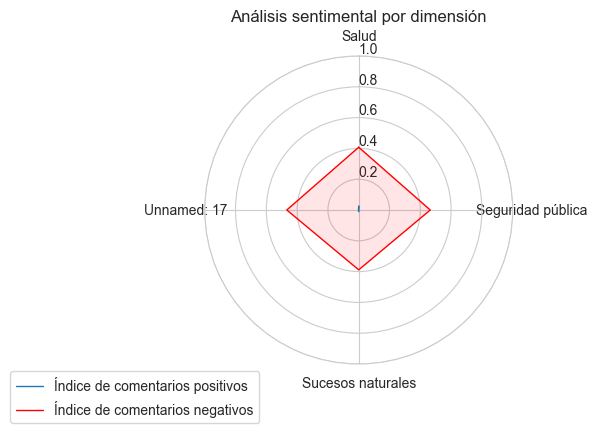

In [5]:
spider_chart(df_tema, 'pos_index', 'neg_index', 'Análisis sentimental por dimensión')

def subtopic(df1):
    temas = df1.tema.drop_duplicates().to_list()
    for i,tema in enumerate(temas):
        sentiment_options = ['POS', 'NEG', 'NEU']
        df = df1[df1['tema'] == tema]
        df['Total']= df[sentiment_options].sum(axis=1)
        df['pos_index'] = df.POS / df.Total
        df['neg_index'] = df.NEG / df.Total
        df = df.fillna(0)
        df = df[['subtema', 'pos_index', 'neg_index']].set_index('subtema')\
            .transpose().reset_index()
        title = str(tema)
        spider_chart(df, 'pos_index', 'neg_index', 'Análisis sentimental por dimensión: '+ title)

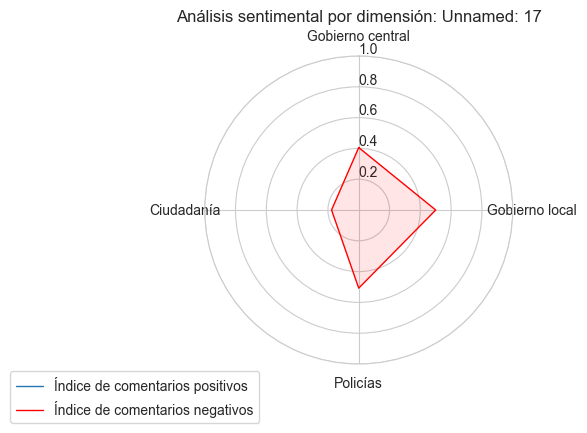

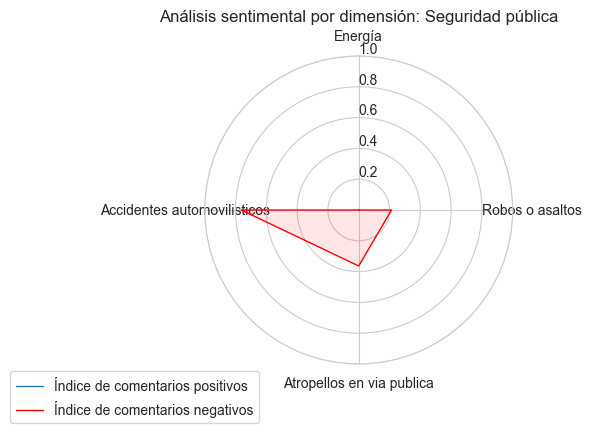

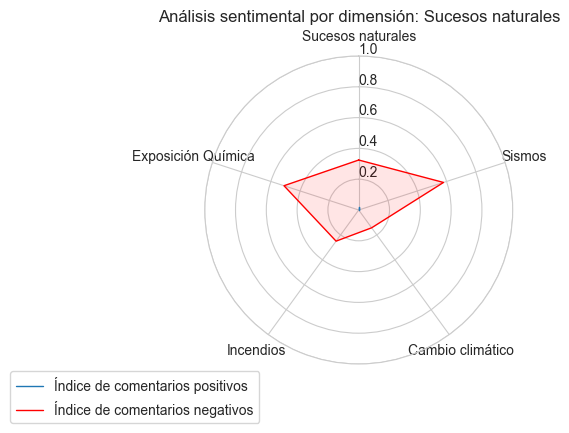

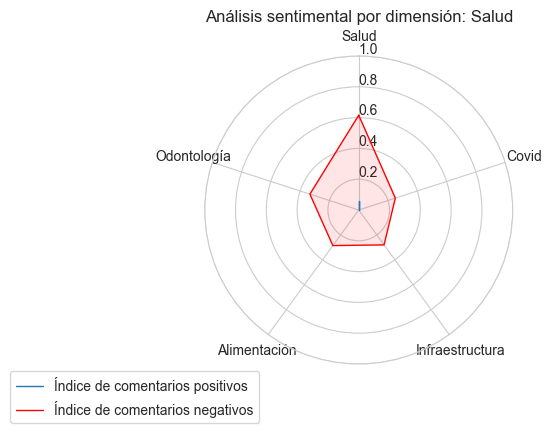

In [6]:
subtopic(df_subtema)

## Análisis geográfico
En caso de tener la información respecto de la ubicación del usuario, se puede hacer un análisis territorial de la información de los tweets.
Se definen las siguiente variables:
df_tweets: Datadrame que contiene la información de los tweets, es NECESARIO que tenga 2 columnas:
    region: columna con la ubicacióin territorial
    sentiment: columna con la información asociada a la sentimentalidad del tweet

df_plot: Dataframe agrupado desde df_tweets, desde donde solo se extraen las dos columnas mencionadas anteriormente.Con eso, se cálcula la distribución de los tweets con sentimentalidad positiva, negativa y neutra por región.

In [7]:
df_plot = df_tweets.groupby(['region', 'sentiment']).size().reset_index().pivot(columns='sentiment', index='region', values=0)
df_plot = df_plot.reset_index()
df_plot.columns = ['Región', 'Negativo', 'Neutro', 'Positivo']
df_plot = df_plot.fillna(0)
df_plot['Total'] = df_plot['Negativo'] + df_plot['Positivo'] + df_plot['Neutro']
df_plot['Negativo'] = df_plot['Negativo'] / df_plot['Total']
df_plot['Positivo'] = df_plot['Positivo'] / df_plot['Total']
df_plot['Neutro'] = df_plot['Neutro'] / df_plot['Total']
df_plot = df_plot[['Región', 'Negativo', 'Neutro', 'Positivo']]
df_plot = df_plot.set_index('Región')

/var/folders/nf/gc0__kh133b5ml5907fvy1xh0000gn/T/ipykernel_66065/479201075.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


<Figure size 1000x400 with 0 Axes>

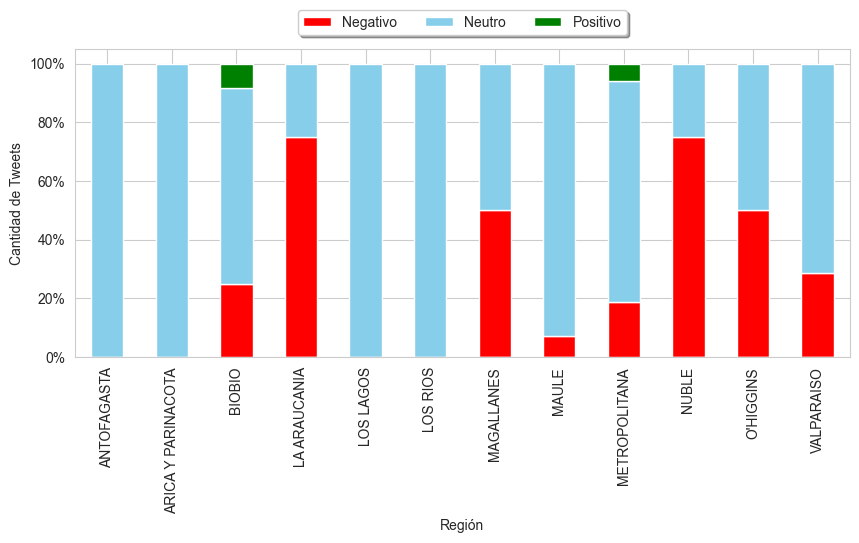

In [8]:
fig = plt.figure()
# ax = plt.subplot(111)
ax = df_plot.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green'])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=True)
ax.set_ylabel('Cantidad de Tweets')
ax.set_xlabel('Región')
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()